In [1]:


import pygmmis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
import matplotlib.cm
import datetime
from functools import partial
import logging
from numpy.random import RandomState
from test_pygmmis import getSelection, plotResults, plotDifferences



/opt/miniconda3/envs/lime_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Setup Data 

In [2]:

# set up test
N = 400             # number of samples
K = 3               # number of components
T = 1               # number of runs
sel_type = "boxWithHole"    # type of selection
disp = 0.5          # additive noise dispersion
bg_amp = 0.0        # fraction of background samples
w = 0.1             # minimum covariance regularization [data units]
cutoff = 5          # cutoff distance between components [sigma]
seed = 0     # seed value
oversampling = 10   # for missing data: imputation samples per observed sample
# show EM iteration results
logging.basicConfig(format='%(message)s',level=logging.INFO)

# define RNG for run
rng = RandomState(seed)





In [3]:

# draw N points from 3-component GMM
D = 2
gmm = pygmmis.GMM(K=3, D=2)
gmm.amp[:] = np.array([ 0.36060026,  0.27986906,  0.206774])
gmm.amp /= gmm.amp.sum()
gmm.mean[:,:] = np.array([[ 0.08016886,  0.21300697],
                            [ 0.70306351,  0.6709532 ],
                            [ 0.01087670,  0.852077]])*10
gmm.covar[:,:,:] = np.array([[[ 0.08530014, -0.00314178],
                                [-0.00314178,  0.00541106]],
                                [[ 0.03053402, 0.0125736],
                                [0.0125736,  0.01075791]],
                                [[ 0.00258605,  0.00409287],
                                [ 0.00409287,  0.01065186]]])*100

In [4]:
# data come from pure GMM model or one with background?
orig = gmm.draw(N, rng=rng)
if bg_amp == 0:
    orig_bg = orig
    bg = None
else:
    footprint = np.array([-10,-10]), np.array([20,20])
    bg = pygmmis.Background(footprint)
    bg.amp = bg_amp
    bg.adjust_amp = True

    bg_size = int(bg_amp/(1-bg_amp) * N)
    orig_bg = np.concatenate((orig, bg.draw(bg_size, rng=rng)))

In [5]:
# add isotropic errors on data
# noisy = orig_bg + rng.normal(0, scale=disp, size=(len(orig_bg), D))
noisy = orig_bg 

# get observational selection function
omega, ps = getSelection(sel_type, rng=rng)

# apply selection
sel = rng.rand(N) < omega(noisy)
data = noisy[sel]
# single covariance for all samples
covar = disp**2 * np.eye(D)


[[-1.22901440e+00  2.09368188e+00]
 [ 1.22291035e+00  2.89783183e+00]
 [ 4.07171321e+00  1.46993546e+00]
 [ 1.92841410e+00  2.15448961e+00]
 [ 9.16664279e-01  1.91677986e+00]
 [ 9.78605713e-01  2.04503404e+00]
 [ 2.88008290e+00  1.45682327e+00]
 [-2.54494604e-02  1.51420641e+00]
 [ 4.17281080e+00  1.77043564e+00]
 [ 1.32653843e+00  3.75173659e+00]
 [ 2.88666341e+00  2.73463587e+00]
 [-1.41438132e+00  1.35186040e+00]
 [-1.49035809e+00  1.35852915e+00]
 [ 8.58504526e+00  2.26568163e+00]
 [ 5.94259650e+00  2.25636269e+00]
 [ 2.84667697e+00  3.25746869e+00]
 [-2.33180665e+00  1.92316946e+00]
 [ 2.77586535e+00  1.16903605e+00]
 [ 2.08139525e+00  1.87579865e+00]
 [ 1.87123950e+00  2.20210999e+00]
 [-8.77895534e-01  2.45047303e+00]
 [ 2.99233358e+00  9.97733698e-01]
 [-3.20306923e+00  1.78559119e+00]
 [ 2.69182858e+00  1.67656833e+00]
 [ 6.17069820e+00  1.57141544e+00]
 [ 2.22021297e+00  2.52582041e+00]
 [-1.23803354e+00  2.21290589e+00]
 [-1.91005585e+00  2.48395070e+00]
 [ 8.52079324e-01  2

/Users/hhjs/Documents/Projects/SNL_directional/test_pygmmis.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode


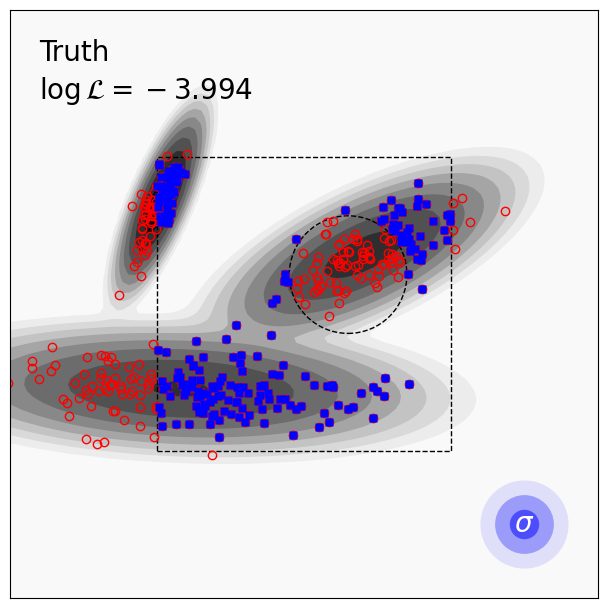

In [6]:

# plot data vs true model
plotResults(orig, data, gmm, patch=ps, description="Truth", disp=disp, log=False)


# EM without imputation, deconvolving via extreme convolution 

initializing spheres with s=3.13 near data points
ITER	SAMPLES	LOG_L	STABLE
0	205	-1106.034	0
1	205	-1043.395	3
2	205	-1009.223	3
3	205	-942.115	3
4	205	-860.978	3
5	205	-794.455	3
6	205	-773.067	3
7	205	-763.809	3
8	205	-757.932	3
9	205	-753.426	3
10	205	-749.771	3
11	205	-746.955	3
12	205	-744.994	3
13	205	-743.762	3
14	205	-743.064	3
likelihood converged within relative tolerance 0.001: stopping here.


execution time 5s
[[-1.22901440e+00  2.09368188e+00]
 [ 1.22291035e+00  2.89783183e+00]
 [ 4.07171321e+00  1.46993546e+00]
 [ 1.92841410e+00  2.15448961e+00]
 [ 9.16664279e-01  1.91677986e+00]
 [ 9.78605713e-01  2.04503404e+00]
 [ 2.88008290e+00  1.45682327e+00]
 [-2.54494604e-02  1.51420641e+00]
 [ 4.17281080e+00  1.77043564e+00]
 [ 1.32653843e+00  3.75173659e+00]
 [ 2.88666341e+00  2.73463587e+00]
 [-1.41438132e+00  1.35186040e+00]
 [-1.49035809e+00  1.35852915e+00]
 [ 8.58504526e+00  2.26568163e+00]
 [ 5.94259650e+00  2.25636269e+00]
 [ 2.84667697e+00  3.25746869e+00]
 [-2.33180665e+00  1.92316946e+00]
 [ 2.77586535e+00  1.16903605e+00]
 [ 2.08139525e+00  1.87579865e+00]
 [ 1.87123950e+00  2.20210999e+00]
 [-8.77895534e-01  2.45047303e+00]
 [ 2.99233358e+00  9.97733698e-01]
 [-3.20306923e+00  1.78559119e+00]
 [ 2.69182858e+00  1.67656833e+00]
 [ 6.17069820e+00  1.57141544e+00]
 [ 2.22021297e+00  2.52582041e+00]
 [-1.23803354e+00  2.21290589e+00]
 [-1.91005585e+00  2.48395070e+00]
 [

Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode


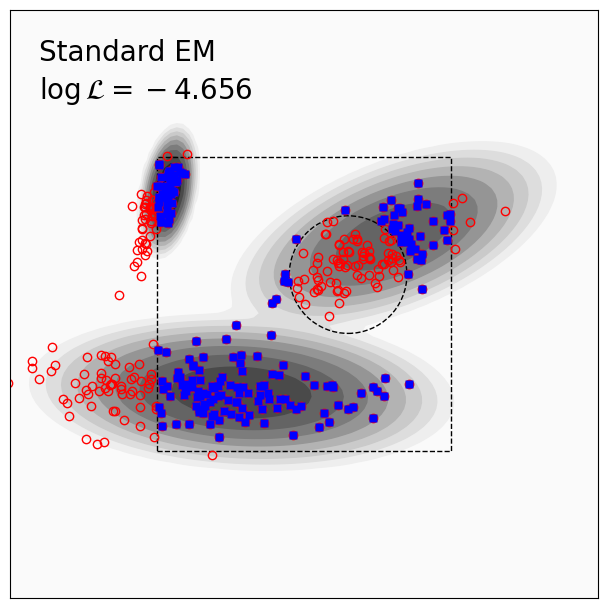

In [7]:
#
# repeated runs: store results and logL
l = np.empty(T)
gmms = [pygmmis.GMM(K=K, D=D) for r in range(T)]

# 1) EM without imputation, ignoring errors
start = datetime.datetime.now()
rng = RandomState(seed)
for r in range(T):
    if bg is not None:
        bg.amp = bg_amp
    l[r], _ = pygmmis.fit(gmms[r], data, w=w, cutoff=cutoff, background=bg, rng=rng)
avg = pygmmis.stack(gmms, l)
print ("execution time %ds" % (datetime.datetime.now() - start).seconds)
plotResults(orig, data, avg, patch=ps, description="Standard EM")

In [12]:
print(avg.mean)
print(avg.amp)

[[0.37417369 8.86503176]
 [8.03750987 7.31249941]
 [2.8601319  2.00603632]]
[0.22439024 0.22545979 0.55014997]


# pygmmis with imputation, igoring errors

initializing spheres with s=3.13 near data points
ITER	SAMPLES	LOG_L	STABLE
0	205	-1106.034	0
1	205	-1043.395	3
2	205	-1009.223	3
3	205	-942.115	3
4	205	-860.978	3
5	205	-794.455	3
6	205	-773.067	3
7	205	-763.809	3
8	205	-757.932	3
9	205	-753.426	3
10	205	-749.771	3
11	205	-746.955	3
12	205	-744.994	3
13	205	-743.762	3
14	205	-743.064	3
likelihood converged within relative tolerance 0.001: stopping here.
ITER	SAMPLES	IMPUTED	ORIG	LOG_L	STABLE
0	205	48.00	252.20	-699.740	3
1	205	76.80	280.00	-686.105	3
2	205	96.20	302.00	-681.001	3
3	205	104.40	312.20	-682.640	3
4	205	111.30	312.20	-682.095	3
5	205	117.50	324.20	-681.673	3
6	205	120.00	324.20	-683.814	3
7	205	134.80	336.10	-677.262	3
8	205	132.50	336.10	-683.372	3
9	205	140.50	343.40	-680.003	3
10	205	152.40	358.60	-676.047	3
11	205	156.30	358.60	-677.495	3
12	205	158.40	367.30	-678.160	3
13	205	161.00	367.30	-676.963	3
14	205	162.10	367.30	-677.460	3
15	205	165.90	367.30	-677.720	3
16	205	166.40	367.30	-680.231	3
17	205	166.50	367.20	-

execution time 9s
[[-1.22901440e+00  2.09368188e+00]
 [ 1.22291035e+00  2.89783183e+00]
 [ 4.07171321e+00  1.46993546e+00]
 [ 1.92841410e+00  2.15448961e+00]
 [ 9.16664279e-01  1.91677986e+00]
 [ 9.78605713e-01  2.04503404e+00]
 [ 2.88008290e+00  1.45682327e+00]
 [-2.54494604e-02  1.51420641e+00]
 [ 4.17281080e+00  1.77043564e+00]
 [ 1.32653843e+00  3.75173659e+00]
 [ 2.88666341e+00  2.73463587e+00]
 [-1.41438132e+00  1.35186040e+00]
 [-1.49035809e+00  1.35852915e+00]
 [ 8.58504526e+00  2.26568163e+00]
 [ 5.94259650e+00  2.25636269e+00]
 [ 2.84667697e+00  3.25746869e+00]
 [-2.33180665e+00  1.92316946e+00]
 [ 2.77586535e+00  1.16903605e+00]
 [ 2.08139525e+00  1.87579865e+00]
 [ 1.87123950e+00  2.20210999e+00]
 [-8.77895534e-01  2.45047303e+00]
 [ 2.99233358e+00  9.97733698e-01]
 [-3.20306923e+00  1.78559119e+00]
 [ 2.69182858e+00  1.67656833e+00]
 [ 6.17069820e+00  1.57141544e+00]
 [ 2.22021297e+00  2.52582041e+00]
 [-1.23803354e+00  2.21290589e+00]
 [-1.91005585e+00  2.48395070e+00]
 [

/Users/hhjs/Documents/Projects/SNL_directional/test_pygmmis.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode


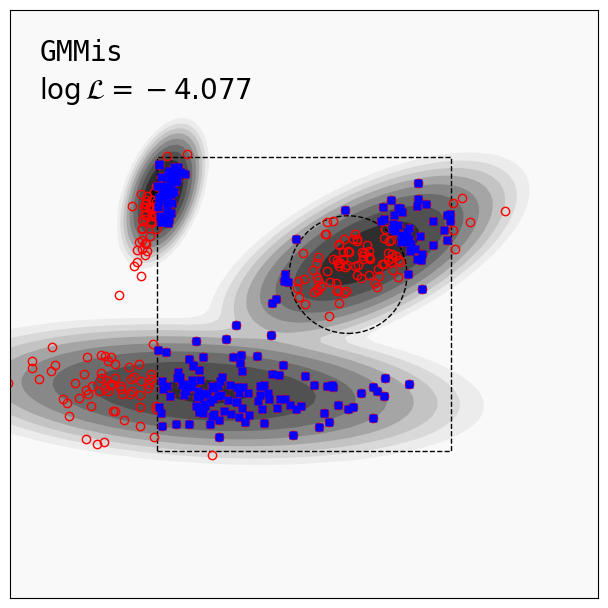

In [13]:
start = datetime.datetime.now()
rng = RandomState(seed)
for r in range(T):
    if bg is not None:
        bg.amp = bg_amp
    pygmmis.fit(gmms[r], data, w=w, cutoff=cutoff, background=bg, rng=rng)
    l[r], _ = pygmmis.fit(gmms[r], data, init_method='none', w=w,  cutoff=cutoff, sel_callback=omega,  oversampling=oversampling, background=bg, rng=rng)
avg = pygmmis.stack(gmms, l)
print ("execution time %ds" % (datetime.datetime.now() - start).seconds)
plotResults(orig, data, avg, patch=ps, description="$\mathtt{GMMis}$")


import torch
best_mean_em = torch.from_numpy(avg.mean)
best_pi_em = torch.from_numpy(avg.amp)
best_covar_em = torch.from_numpy(avg.covar)


In [15]:
print(best_mean_em)
print(best_pi_em)

tensor([[0.1823, 8.7861],
        [7.2125, 6.7392],
        [1.5891, 2.0480]], dtype=torch.float64)
tensor([0.1895, 0.3895, 0.4210], dtype=torch.float64)


# 4) pygmmis with imputation, incorporating errors


initializing spheres with s=3.13 near data points
ITER	SAMPLES	LOG_L	STABLE
0	205	-1106.034	0
1	205	-1043.395	3
2	205	-1009.223	3
3	205	-942.115	3
4	205	-860.978	3
5	205	-794.455	3
6	205	-773.067	3
7	205	-763.809	3
8	205	-757.932	3
9	205	-753.426	3
10	205	-749.771	3
11	205	-746.955	3
12	205	-744.994	3
13	205	-743.762	3
14	205	-743.064	3
likelihood converged within relative tolerance 0.001: stopping here.
ITER	SAMPLES	IMPUTED	ORIG	LOG_L	STABLE
0	205	69.50	276.70	-715.655	3
1	205	91.30	297.40	-704.736	3
2	205	96.20	297.40	-706.836	3
3	205	111.90	314.50	-699.262	3
4	205	125.20	334.00	-694.585	3
5	205	130.10	334.00	-695.548	3
6	205	139.00	342.50	-691.455	3
7	205	145.20	351.40	-690.818	3
8	205	144.70	349.90	-693.675	3
9	205	156.80	360.20	-687.611	3
10	205	167.40	374.60	-686.149	3
11	205	167.70	374.60	-689.790	3
12	205	168.60	374.60	-691.222	3
13	205	167.70	374.60	-691.919	3
14	205	174.00	374.60	-690.529	3
15	205	188.50	393.20	-683.978	3
16	205	185.10	393.20	-689.221	3
17	205	190.80	393.20	-

execution time 10s
[[-1.22901440e+00  2.09368188e+00]
 [ 1.22291035e+00  2.89783183e+00]
 [ 4.07171321e+00  1.46993546e+00]
 [ 1.92841410e+00  2.15448961e+00]
 [ 9.16664279e-01  1.91677986e+00]
 [ 9.78605713e-01  2.04503404e+00]
 [ 2.88008290e+00  1.45682327e+00]
 [-2.54494604e-02  1.51420641e+00]
 [ 4.17281080e+00  1.77043564e+00]
 [ 1.32653843e+00  3.75173659e+00]
 [ 2.88666341e+00  2.73463587e+00]
 [-1.41438132e+00  1.35186040e+00]
 [-1.49035809e+00  1.35852915e+00]
 [ 8.58504526e+00  2.26568163e+00]
 [ 5.94259650e+00  2.25636269e+00]
 [ 2.84667697e+00  3.25746869e+00]
 [-2.33180665e+00  1.92316946e+00]
 [ 2.77586535e+00  1.16903605e+00]
 [ 2.08139525e+00  1.87579865e+00]
 [ 1.87123950e+00  2.20210999e+00]
 [-8.77895534e-01  2.45047303e+00]
 [ 2.99233358e+00  9.97733698e-01]
 [-3.20306923e+00  1.78559119e+00]
 [ 2.69182858e+00  1.67656833e+00]
 [ 6.17069820e+00  1.57141544e+00]
 [ 2.22021297e+00  2.52582041e+00]
 [-1.23803354e+00  2.21290589e+00]
 [-1.91005585e+00  2.48395070e+00]
 

/Users/hhjs/Documents/Projects/SNL_directional/test_pygmmis.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode


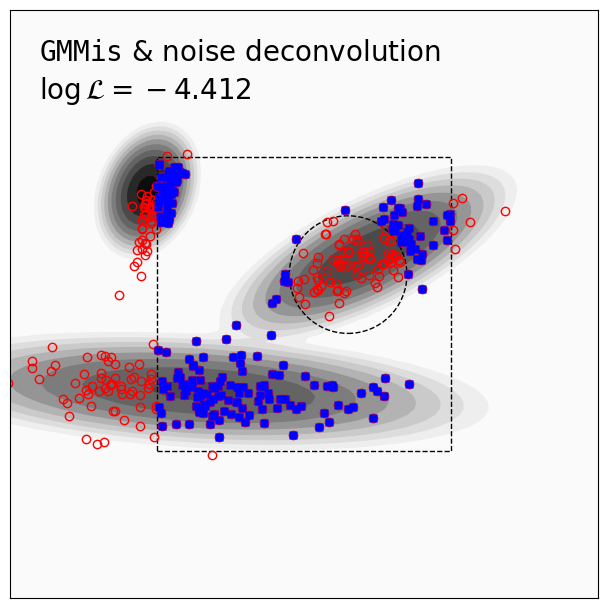

In [ ]:

covar_cb = partial(pygmmis.covar_callback_default, default=np.eye(D)*disp**2)
start = datetime.datetime.now()
rng = RandomState(seed)
for r in range(T):
    if bg is not None:
        bg.amp = bg_amp
    pygmmis.fit(gmms[r], data, w=w, cutoff=cutoff, background=bg, rng=rng)
    l[r], _ = pygmmis.fit(gmms[r], data, covar=covar, init_method='none', w=w, cutoff=cutoff, sel_callback=omega, oversampling=oversampling, covar_callback=covar_cb, background=bg, rng=rng)
avg = pygmmis.stack(gmms, l)
print(avg)
print ("execution time %ds" % (datetime.datetime.now() - start).seconds)
plotResults(orig, data, avg, patch=ps, description="$\mathtt{GMMis}$ & noise deconvolution")

# SNL

### Data for SNL

In [ ]:

batch_size_snl = 400
proposal_sample = batch_size_snl * 10
lr = 0.01
# n_epochs = 100
n_iter = 10000

config = {
    'n_iter': n_iter,
    'lr': lr,
    'proposal_sample': proposal_sample,
    'batch_size': batch_size_snl,
    'n_iter': n_iter,
    'seed': seed,
}


In [ ]:
from Model.Energy import GeneralizedGaussianMixtureEnergy,GeneralizedGaussianMixtureEnergyVectorParam, CircleTruncation, CombineTruncation, MaxMinTruncation
from Model.Proposal import GaussianProposal, UniformProposal, MixtureOfGeneralizedGaussianProposal, MixtureOfGaussianProposal
from Data import get_dataloader_from_data
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from Model.Trainer import SNLTrainer
from Model.Energy import MaxMinCensorship
import random

In [ ]:
train_dataset = TensorDataset(torch.tensor(data, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(torch.tensor(orig, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=True)


In [ ]:

# proposal_distribution = GaussianProposal(torch.Size([2,]), torch.tensor([0,0], dtype=torch.float32), torch.tensor([10,10], dtype=torch.float32))
# proposal_distribution.mu.data = torch.tensor([5,5], dtype=torch.float32)
# proposal_distribution.sigma.data = torch.tensor([7,7], dtype=torch.float32)
proposal_distribution = UniformProposal(torch.Size([2,]), torch.tensor([0,0], dtype=torch.float32), torch.tensor([10,10], dtype=torch.float32))


Init Standard Gaussian...


### Energy 

In [ ]:
energy = GeneralizedGaussianMixtureEnergy(dim=2, num_cluster=3, learn_pi=True, learn_mu=True, learn_sigma=True)
# energy = GeneralizedGaussianMixtureEnergyVectorParam(dim=2, num_cluster=3, learn_pi=True, learn_mu=True, learn_sigma=True)

In [ ]:
# KMeans on Data :
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
centers = kmeans.cluster_centers_

energy.mu.data = torch.tensor(centers, dtype=torch.float32)




/opt/miniconda3/envs/lime_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
circle_truncation = CircleTruncation(center = torch.tensor([6.5, 6], dtype=torch.float32), radius=2)
maxmin_truncation = MaxMinTruncation(min = torch.tensor([0,0], dtype=torch.float32), max = torch.tensor([10,10], dtype=torch.float32))
combine_truncation = CombineTruncation([circle_truncation, maxmin_truncation])



/Users/hhjs/Documents/Projects/SNL_directional/Model/Energy/Truncation/abstract_truncation.py:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.max = torch.tensor(max, dtype=torch.float32)
/Users/hhjs/Documents/Projects/SNL_directional/Model/Energy/Truncation/abstract_truncation.py:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.min = torch.tensor(min, dtype=torch.float32)


In [ ]:
energy.set_truncator(combine_truncation)

In [ ]:


# energy.mu.data = best_mean_em
# energy.logit_pi.data = best_pi_em.log()
# energy.L_sigma_inv.data = torch.inverse(torch.linalg.cholesky(best_covar_em, ))

# Trainer

## Trainer Uniform

In [ ]:
trainer = SNLTrainer(
                energy,
                proposal_distribution,
                dataloader=train_loader,
                val_dataloader=train_loader,
                n_sample_train=proposal_sample,
                n_sample_test=10000,
                lr=lr,
                weight_decay=1e-4,
                )


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hugosenetaire. Use `wandb login --relogin` to force relogin


[[-1.22901440e+00  2.09368188e+00]
 [ 1.22291035e+00  2.89783183e+00]
 [ 4.07171321e+00  1.46993546e+00]
 [ 1.92841410e+00  2.15448961e+00]
 [ 9.16664279e-01  1.91677986e+00]
 [ 9.78605713e-01  2.04503404e+00]
 [ 2.88008290e+00  1.45682327e+00]
 [-2.54494604e-02  1.51420641e+00]
 [ 4.17281080e+00  1.77043564e+00]
 [ 1.32653843e+00  3.75173659e+00]
 [ 2.88666341e+00  2.73463587e+00]
 [-1.41438132e+00  1.35186040e+00]
 [-1.49035809e+00  1.35852915e+00]
 [ 8.58504526e+00  2.26568163e+00]
 [ 5.94259650e+00  2.25636269e+00]
 [ 2.84667697e+00  3.25746869e+00]
 [-2.33180665e+00  1.92316946e+00]
 [ 2.77586535e+00  1.16903605e+00]
 [ 2.08139525e+00  1.87579865e+00]
 [ 1.87123950e+00  2.20210999e+00]
 [-8.77895534e-01  2.45047303e+00]
 [ 2.99233358e+00  9.97733698e-01]
 [-3.20306923e+00  1.78559119e+00]
 [ 2.69182858e+00  1.67656833e+00]
 [ 6.17069820e+00  1.57141544e+00]
 [ 2.22021297e+00  2.52582041e+00]
 [-1.23803354e+00  2.21290589e+00]
 [-1.91005585e+00  2.48395070e+00]
 [ 8.52079324e-01  2

Substituting symbol L from STIXNonUnicode
/Users/hhjs/Documents/Projects/SNL_directional/test_pygmmis.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
Substituting symbol L from STIXNonUnicode


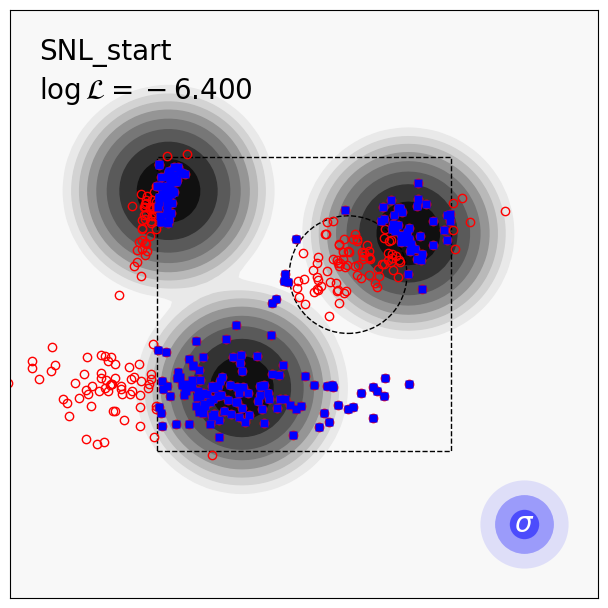

In [ ]:
D = 2
gmm = pygmmis.GMM(K=3, D=2)
gmm.amp[:] = torch.nn.functional.log_softmax(energy.logit_pi, dim=-1).exp().detach().numpy()
gmm.amp /= gmm.amp.sum()
gmm.mean[:,:] = energy.mu.detach().numpy()
gmm.covar[:,:,:] = torch.linalg.inv(energy.get_precision_matrix()).detach().numpy()
# plot data vs true model
plotResults(orig, data, gmm, patch=ps, description="SNL_start", disp=disp, log=True, name="SNL_start", )


In [ ]:
trainer.train(n_iter=n_iter, n_iter_pretrain=1000, plot_every=500)

/Users/hhjs/Documents/Projects/SNL_directional/Model/Energy/generalized_gaussian_mixture_matrix_param.py:102: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  torch.nn.functional.log_softmax(self.logit_pi) - energy_per_cluster, dim=-1


ValueError: Expected value argument (Tensor of shape (4000, 2)) to be within the support (Interval(lower_bound=Parameter containing:
tensor([0., 0.]), upper_bound=Parameter containing:
tensor([10., 10.]))) of the distribution Uniform(low: torch.Size([2]), high: torch.Size([2])), but found invalid values:
tensor([[9.1934, 1.0860],
        [2.0782, 7.6096],
        [2.8022, 9.9576],
        ...,
        [3.8078, 6.8893],
        [2.6064, 6.8896],
        [7.0704, 3.7117]])

[[-1.22901440e+00  2.09368188e+00]
 [ 1.22291035e+00  2.89783183e+00]
 [ 4.07171321e+00  1.46993546e+00]
 [ 1.92841410e+00  2.15448961e+00]
 [ 9.16664279e-01  1.91677986e+00]
 [ 9.78605713e-01  2.04503404e+00]
 [ 2.88008290e+00  1.45682327e+00]
 [-2.54494604e-02  1.51420641e+00]
 [ 4.17281080e+00  1.77043564e+00]
 [ 1.32653843e+00  3.75173659e+00]
 [ 2.88666341e+00  2.73463587e+00]
 [-1.41438132e+00  1.35186040e+00]
 [-1.49035809e+00  1.35852915e+00]
 [ 8.58504526e+00  2.26568163e+00]
 [ 5.94259650e+00  2.25636269e+00]
 [ 2.84667697e+00  3.25746869e+00]
 [-2.33180665e+00  1.92316946e+00]
 [ 2.77586535e+00  1.16903605e+00]
 [ 2.08139525e+00  1.87579865e+00]
 [ 1.87123950e+00  2.20210999e+00]
 [-8.77895534e-01  2.45047303e+00]
 [ 2.99233358e+00  9.97733698e-01]
 [-3.20306923e+00  1.78559119e+00]
 [ 2.69182858e+00  1.67656833e+00]
 [ 6.17069820e+00  1.57141544e+00]
 [ 2.22021297e+00  2.52582041e+00]
 [-1.23803354e+00  2.21290589e+00]
 [-1.91005585e+00  2.48395070e+00]
 [ 8.52079324e-01  2

Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode


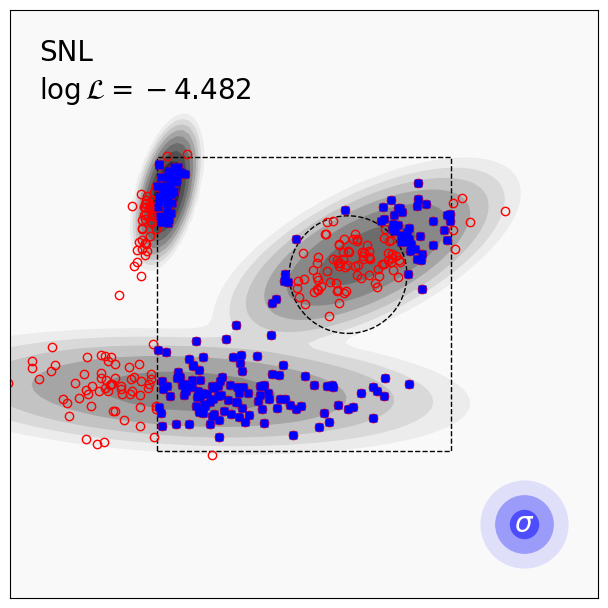

In [ ]:
D = 2
gmm = pygmmis.GMM(K=3, D=2)
gmm.amp[:] = torch.nn.functional.log_softmax(energy.logit_pi, dim=-1).exp().detach().numpy()
gmm.amp /= gmm.amp.sum()
gmm.mean[:,:] = energy.mu.detach().numpy()
gmm.covar[:,:,:] = torch.linalg.inv(energy.get_precision_matrix()).detach().numpy()
# plot data vs true model
# plotResults(orig[:1], data[:1], gmm, patch=ps, description="SNL", disp=disp)
plotResults(orig, data, gmm, patch=ps, description="SNL", disp=disp, log=True, name="SNL Best", step =trainer.total_step)

In [ ]:
test_sample = energy.sample(280)

[[-1.22901440e+00  2.09368188e+00]
 [ 1.22291035e+00  2.89783183e+00]
 [ 4.07171321e+00  1.46993546e+00]
 [ 1.92841410e+00  2.15448961e+00]
 [ 9.16664279e-01  1.91677986e+00]
 [ 9.78605713e-01  2.04503404e+00]
 [ 2.88008290e+00  1.45682327e+00]
 [-2.54494604e-02  1.51420641e+00]
 [ 4.17281080e+00  1.77043564e+00]
 [ 1.32653843e+00  3.75173659e+00]
 [ 2.88666341e+00  2.73463587e+00]
 [-1.41438132e+00  1.35186040e+00]
 [-1.49035809e+00  1.35852915e+00]
 [ 8.58504526e+00  2.26568163e+00]
 [ 5.94259650e+00  2.25636269e+00]
 [ 2.84667697e+00  3.25746869e+00]
 [-2.33180665e+00  1.92316946e+00]
 [ 2.77586535e+00  1.16903605e+00]
 [ 2.08139525e+00  1.87579865e+00]
 [ 1.87123950e+00  2.20210999e+00]
 [-8.77895534e-01  2.45047303e+00]
 [ 2.99233358e+00  9.97733698e-01]
 [-3.20306923e+00  1.78559119e+00]
 [ 2.69182858e+00  1.67656833e+00]
 [ 6.17069820e+00  1.57141544e+00]
 [ 2.22021297e+00  2.52582041e+00]
 [-1.23803354e+00  2.21290589e+00]
 [-1.91005585e+00  2.48395070e+00]
 [ 8.52079324e-01  2

Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode


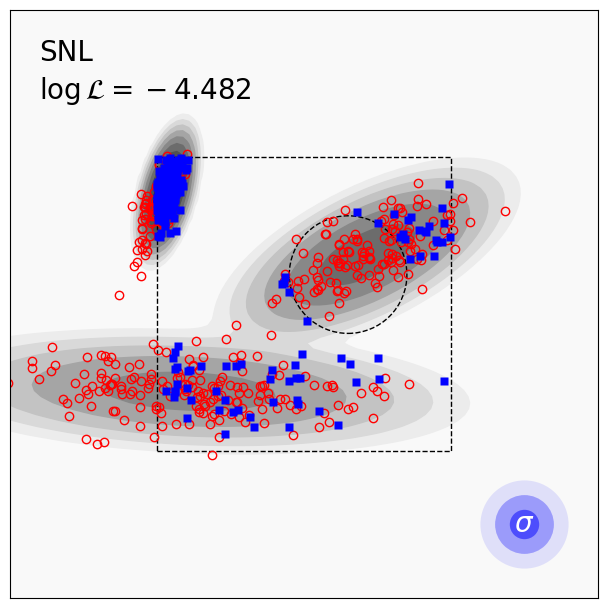

In [ ]:
# Compare noisy and test_sample
plotResults(orig, test_sample, gmm, patch=ps, description="SNL", disp=disp, log=True, name="SNL Best", step =trainer.total_step)

In [ ]:
print(energy(torch.from_numpy(noisy).to(dtype=torch.float32)).mean())

tensor(48750000., grad_fn=<MeanBackward0>)


### Load best

Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode


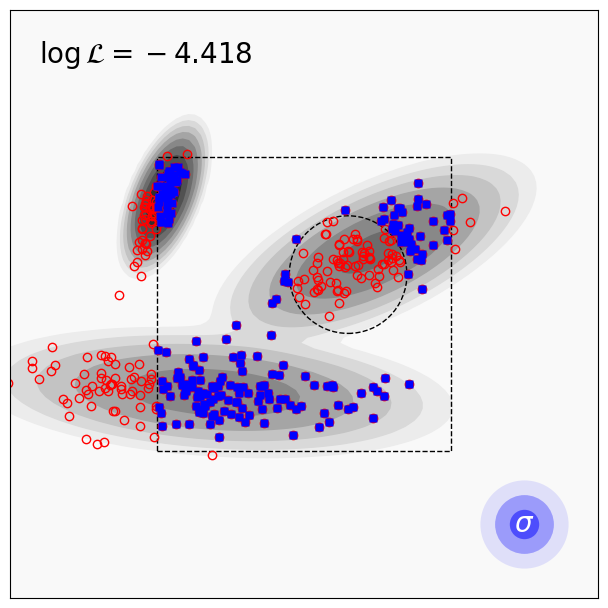

wandb: Network error (ConnectTimeout), entering retry loop.


In [ ]:
trainer.get_best_model()
best_energy = trainer.best_energy
D = 2
gmm = pygmmis.GMM(K=3, D=2)
gmm.amp[:] = torch.nn.functional.log_softmax(best_energy.logit_pi, dim=-1).exp().detach().numpy()
gmm.amp /= gmm.amp.sum()
gmm.mean[:,:] = best_energy.mu.detach().numpy()
gmm.covar[:,:,:] = torch.linalg.inv(best_energy.get_precision_matrix()).detach().numpy()
# plot data vs true model
# plotResults(orig[:1], data[:1], gmm, patch=ps, description="SNL", disp=disp)
plotResults(orig, data, gmm, patch=ps, disp = disp, log=True, name="SNL Uniform", step=trainer.best_step)

## Trainer Mixture

In [ ]:
logit = torch.nn.functional.log_softmax(energy.logit_pi, dim=-1).exp().detach()
mean = energy.mu.detach()
covar = torch.linalg.inv(energy.get_precision_matrix()).detach()
proposal_v2 = MixtureOfGeneralizedGaussianProposal(input_size = torch.Size((2,)), logit_pi = logit, mu = mean, sigma = covar)
trainer.proposal = proposal_v2

In [ ]:
trainer.train(n_iter=n_iter, n_iter_pretrain=0, plot_every=500)

In [ ]:
D = 2
gmm = pygmmis.GMM(K=3, D=2)
gmm.amp[:] = torch.nn.functional.log_softmax(energy.logit_pi, dim=-1).exp().detach().numpy()
gmm.amp /= gmm.amp.sum()
gmm.mean[:,:] = energy.mu.detach().numpy()
gmm.covar[:,:,:] = torch.linalg.inv(energy.get_precision_matrix()).detach().numpy()
# plot data vs true model
# plotResults(orig[:1], data[:1], gmm, patch=ps, description="SNL", disp=disp)
plotResults(orig, data, gmm, patch=ps, description="SNL Self Proposal", disp=disp, log=True, name="SNL_self_proposal", step =trainer.total_step)

### Load best

In [ ]:
trainer.get_best_model()
best_energy = trainer.best_energy
D = 2
gmm = pygmmis.GMM(K=3, D=2)
gmm.amp[:] = torch.nn.functional.log_softmax(best_energy.logit_pi, dim=-1).exp().detach().numpy()
gmm.amp /= gmm.amp.sum()
gmm.mean[:,:] = best_energy.mu.detach().numpy()
gmm.covar[:,:,:] = torch.linalg.inv(best_energy.get_precision_matrix()).detach().numpy()
# plot data vs true model
# plotResults(orig[:1], data[:1], gmm, patch=ps, description="SNL", disp=disp)
plotResults(orig, data, gmm, patch=ps, log=True, description="SNL_self_proposal_best", disp=disp, step = trainer.best_step)